## **Tarea semana 06: Ecuaciones diferenciales ordinarias (EDO)** 
#### IF4702 - Física Computacional I
#### Grupo 1, primer semestre 2022
<p> ----------------------------------------------------------------------------------------
<p> Valeria Bonilla Rojas (carné: 2018254434)
<p> María Fernanda Quesada Mena (carné: 2020036474)


In [2]:
# Importación de librerías
import numpy as np
from scipy.integrate import solve_ivp
import scipy.integrate as spint
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tabulate import tabulate

### **Problema 1**

╒══════════╤═════════════╕
│   Tiempo │   Velocidad │
╞══════════╪═════════════╡
│     0    │    0        │
├──────────┼─────────────┤
│     0.05 │    0.323913 │
├──────────┼─────────────┤
│     0.1  │    0.520423 │
├──────────┼─────────────┤
│     0.15 │    0.639453 │
├──────────┼─────────────┤
│     0.2  │    0.711851 │
├──────────┼─────────────┤
│     0.25 │    0.755525 │
├──────────┼─────────────┤
│     0.3  │    0.782267 │
├──────────┼─────────────┤
│     0.35 │    0.798231 │
├──────────┼─────────────┤
│     0.4  │    0.808111 │
├──────────┼─────────────┤
│     0.45 │    0.814063 │
├──────────┼─────────────┤
│     0.5  │    0.817518 │
├──────────┼─────────────┤
│     0.55 │    0.81982  │
├──────────┼─────────────┤
│     0.6  │    0.821182 │
├──────────┼─────────────┤
│     0.65 │    0.821866 │
├──────────┼─────────────┤
│     0.7  │    0.822355 │
├──────────┼─────────────┤
│     0.75 │    0.822752 │
├──────────┼─────────────┤
│     0.8  │    0.822949 │
├──────────┼─────────────┤
│

<Figure size 432x288 with 0 Axes>

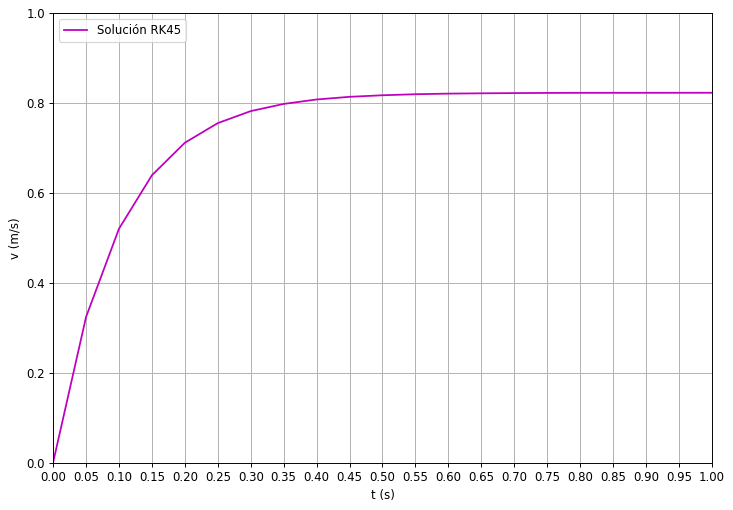

In [8]:
# Definir los valores de las constantes
p = 7.874*10**(-3) 
pf = 1.260*10**(-3)
g = 9.8
a = 10
"""
Donde:  
Variables en la función
------------------------
p : densidad del objeto
pf: densidad del fluido
g : aceleración de la gravedad
a : viscosidad del fluido
v : velocidad en t s
t : tiempo
"""
#Se define la función a analizar
def Funcion(t,v):
    valorFuncion = ((((p-pf)/p)*g)-(a*v))
    return valorFuncion

#Se define la condición inicial para v 
v0 = [0.0]

#Se definen los parámetros de evaluación
ti = 0.0
tf = 1.0
n = 21
tiempo = np.linspace(ti, tf, n)

#Se calcula la solución de la EDO
metodoRK = "RK45"
solucion_EDO = spint.solve_ivp(Funcion, [ti, tf], v0, t_eval=tiempo, method = metodoRK)
velocidad = solucion_EDO.y[0]

info = {'Tiempo':tiempo, 'Velocidad':velocidad}

#Se grafica la solución obtenida en solucion_sistema_EDO
fig = plt.figure()
figure(figsize=(10, 7), dpi=85)
plt.plot(solucion_EDO.t, solucion_EDO.y[0], 'm-', label="Solución RK45")
plt.legend(loc= "upper left")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.grid()
#Se resumen los datos en una tabla
print(tabulate(info, headers='keys', tablefmt='fancy_grid'))
plt.xticks(np.arange(0, 1.05, 0.05))
plt.show()




### **Problema 2**

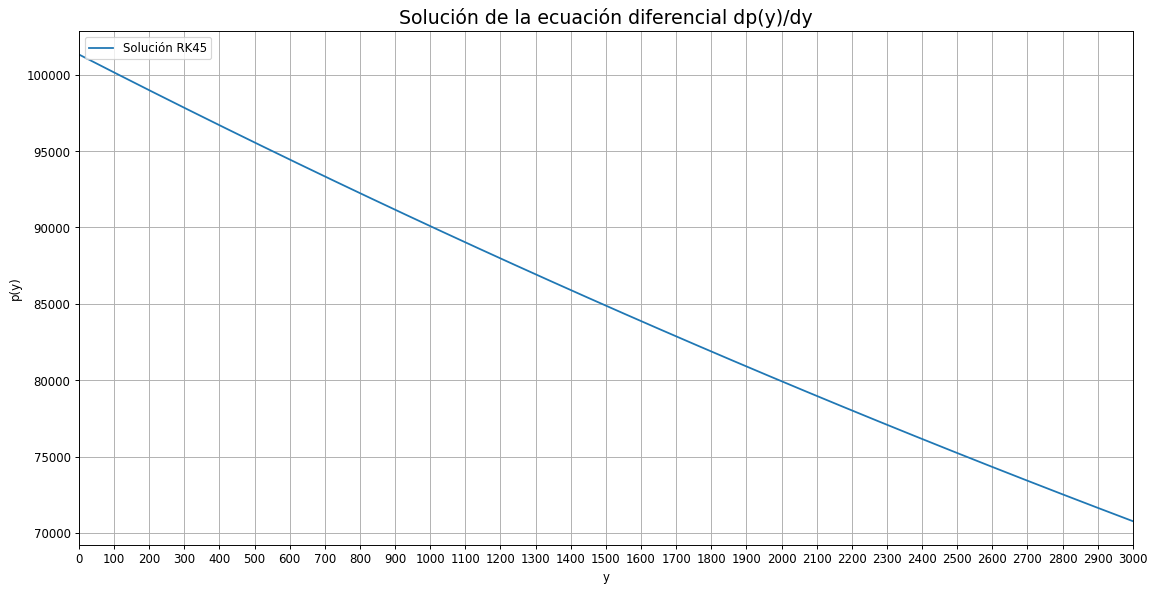

In [5]:
# Definir los valores de las constantes
M = 28.9647*10**(-3)
R = 8.314462
g = 9.8
"""
Donde:  
Variables en la función
------------------------
p : presión
M : masa molar
g : aceleración de la gravedad
"""
# Definir la ecuación diferencial
p = lambda y, p: -(M/(R*(293.0-y/200.0))*p)*g

# Definir la condición inicial
p0 = [101325.0]

# Definir los puntos en los que integrar
NPuntos = int(3000/100)
puntos_Altura = np.linspace(0,3000,NPuntos)

# Resolver la ecuación diferencial
sol = solve_ivp(p,[0,3000], p0, method='RK45',t_eval=puntos_Altura)

# Graficar la solución del método
figure(figsize=(16, 8), dpi=85)
plt.plot(sol.t,sol.y[0],label="Solución RK45")
plt.legend(loc="upper left")
plt.title("Solución de la ecuación diferencial dp(y)/dy", fontsize=16)
plt.xlabel('y')
plt.ylabel('p(y)')
plt.xlim([0,3000])
plt.grid()
plt.xticks(np.arange(0, 3100, 100))
plt.show()

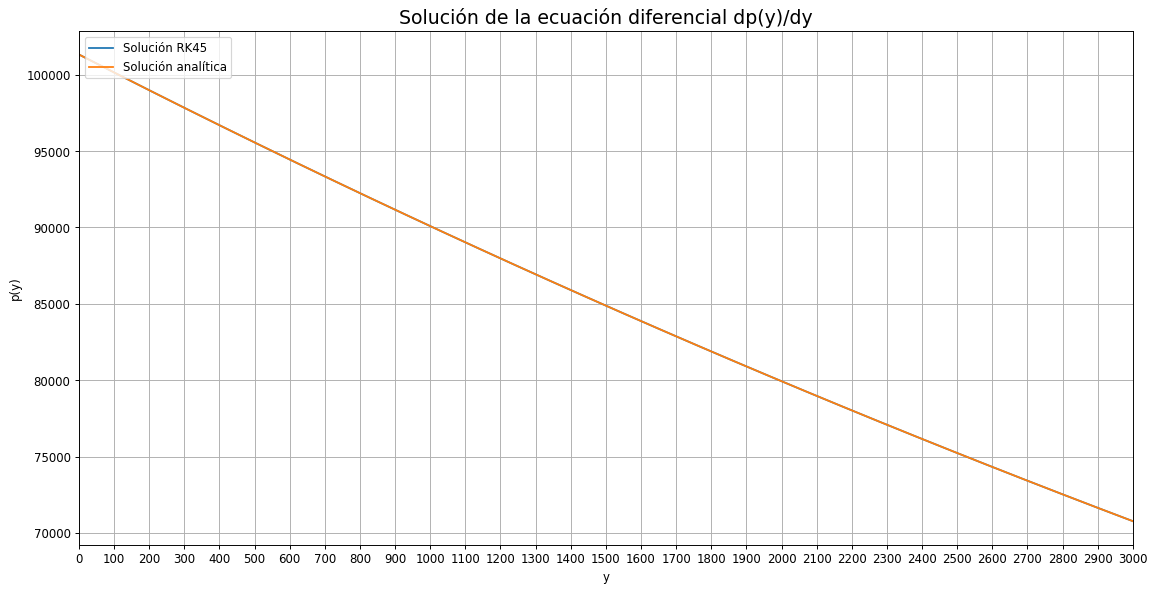

In [7]:
# Definir la función que describe la solución analítica de la EDO
def p(y): 
   p = 2.82295*10**(-28)*(58600-y)**(6.82796)
   return p

# Calcular los puntos Y correspondientes a la solución analítica
solAnalitica_Y = p(puntos_Altura)

# Graficar tanto la solución del método RK45 como la analítica
figure(figsize=(16, 8), dpi=85)
plt.plot(puntos_Altura,sol.y[0],label="Solución RK45")
plt.plot(puntos_Altura, solAnalitica_Y,label="Solución analítica")
plt.legend(loc="upper left")
plt.title("Solución de la ecuación diferencial dp(y)/dy", fontsize=16)
plt.xlabel('y')
plt.ylabel('p(y)')
plt.xlim([0,3000])
plt.grid()
plt.xticks(np.arange(0, 3100, 100))
plt.show()